<h2><b><center><u>A/B Testing Analysis of Facebook vs Google AdWords Marketing Campaigns</u></center></b></h2>

<h4><u>Business Problem</u></h4>

Our company is running paid ad campaigns on both Facebook and Google AdWords. Management wants to identify which platform delivers better marketing performance in terms of attracting potential customers and driving conversions, while keeping costs low. The goal is to optimize future ad spend by focusing on the higher-performing platform.



<h4><u>Research Questions</u></h4>

* Is there a significant difference in the Click-Through Rate (CTR) between Facebook and AdWords campaigns?
* Which platform yields a higher Conversion Rate (CVR) on average?
* Which platform is more cost-effective in terms of Cost per Click (CPC)?
* Are the observed differences in CTR, CVR, and CPC between the two platforms statistically significant?
* How does ad performance vary over time (e.g., by month or quarter)?
* Are there any patterns that suggest seasonality or campaign fatigue?
* Based on the analysis, should the company increase, reduce, or redistribute its budget allocation between Facebook and AdWords?

In [4]:
## load imp libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon, shapiro 


In [5]:
# import data

df = pd.read_csv('marketing_campaign.csv')

In [6]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [8]:
# convert date column to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# clean and convert  facebook related columns

# Clean and convert Facebook columns
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].str.replace('[$,]', '', regex=True).astype(float)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%', '', regex=True).astype(float)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%', '', regex=True).astype(float)
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace('[$,]', '', regex=True).astype(float)

# Clean and convert AdWords columns
df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].str.replace('[$,]', '', regex=True).astype(float)
df['AdWords Click-Through Rate (Clicks / View)'] = df['AdWords Click-Through Rate (Clicks / View)'].str.replace('%', '', regex=True).astype(float)
df['AdWords Conversion Rate (Conversions / Click)'] = df['AdWords Conversion Rate (Conversions / Click)'].str.replace('%', '', regex=True).astype(float)
df['AdWords Cost per Click (Ad Cost / Clicks)'] = df['AdWords Cost per Click (Ad Cost / Clicks)'].str.replace('[$,]', '', regex=True).astype(float)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    float64       
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    float64       
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    float64       
 8   Facebook Cost per Click (Ad Cost / Click

In [31]:
df.rename(columns={
    'Date': 'Date',
    'Facebook Ad Campaign': 'FB_Campaign',
    'Facebook Ad Views': 'FB_Views',
    'Facebook Ad Clicks': 'FB_Clicks',
    'Facebook Ad Conversions': 'FB_Conversions',
    'Cost per Facebook Ad': 'FB_Cost',
    'Facebook Click-Through Rate (Clicks / View)': 'FB_CTR',
    'Facebook Conversion Rate (Conversions / Clicks)': 'FB_CVR',
    'Facebook Cost per Click (Ad Cost / Clicks)': 'FB_CPC',
    
    'AdWords Ad Campaign': 'ADW_Campaign',
    'AdWords Ad Views': 'ADW_Views',
    'AdWords Ad Clicks': 'ADW_Clicks',
    'AdWords Ad Conversions': 'ADW_Conversions',
    'Cost per AdWords Ad': 'ADW_Cost',
    'AdWords Click-Through Rate (Clicks / View)': 'ADW_CTR',
    'AdWords Conversion Rate (Conversions / Click)': 'ADW_CVR',
    'AdWords Cost per Click (Ad Cost / Clicks)': 'ADW_CPC'
}, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   FB_Campaign      365 non-null    object        
 2   FB_Views         365 non-null    int64         
 3   FB_Clicks        365 non-null    int64         
 4   FB_Conversions   365 non-null    int64         
 5   FB_Cost          365 non-null    float64       
 6   FB_CTR           365 non-null    float64       
 7   FB_CVR           365 non-null    float64       
 8   FB_CPC           365 non-null    float64       
 9   ADW_Campaign     365 non-null    object        
 10  ADW_Views        365 non-null    int64         
 11  ADW_Clicks       365 non-null    int64         
 12  ADW_Conversions  365 non-null    int64         
 13  ADW_Cost         365 non-null    float64       
 14  ADW_CTR          365 non-null    float64  

In [35]:
df.isnull().sum()

Date               0
FB_Campaign        0
FB_Views           0
FB_Clicks          0
FB_Conversions     0
FB_Cost            0
FB_CTR             0
FB_CVR             0
FB_CPC             0
ADW_Campaign       0
ADW_Views          0
ADW_Clicks         0
ADW_Conversions    0
ADW_Cost           0
ADW_CTR            0
ADW_CVR            0
ADW_CPC            0
dtype: int64

In [37]:
df.describe()

,Date,FB_Views,FB_Clicks,FB_Conversions,FB_Cost,FB_CTR,FB_CVR,FB_CPC,ADW_Views,ADW_Clicks,ADW_Conversions,ADW_Cost,ADW_CTR,ADW_CVR,ADW_CPC
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,2.201288,27.153288,2.187808,4717.19726,60.383562,5.980822,134.975342,1.295781,10.184356,2.377863
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.830000,21.480000,0.610000,3714.00000,31.000000,3.000000,73.000000,0.570000,6.130000,0.850000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,1.490000,23.800000,1.410000,4247.00000,49.000000,5.000000,110.000000,1.030000,7.700000,1.760000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,2.000000,26.770000,2.020000,4711.00000,60.000000,6.000000,135.000000,1.290000,9.930000,2.290000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,2.670000,28.970000,2.760000,5190.00000,73.000000,7.000000,162.000000,1.520000,12.030000,2.810000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,5.370000,47.590000,7.140000,5760.00000,89.000000,9.000000,197.000000,2.250000,20.060000,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.933193,4.165921,1.040820,561.11406,14.368225,1.628106,32.338304,0.338782,2.887445,0.856929


### Is there a significant difference in the Click-Through Rate (CTR) between Facebook and AdWords campaigns?

In [45]:
## check for normality

shapiro_fb = shapiro(df['FB_CTR'])
shapiro_ad = shapiro(df['ADW_CTR'])

## select appropriate test

if shapiro_fb.pvalue > 0.05 and shapiro_ad.pvalue > 0.05:
    stat, p_value = ttest_rel(df['FB_CTR'], df['ADW_CTR'])
    print("Test: paired t-test")
else:
    stat, p_value = wilcoxon(df['FB_CTR'], df['ADW_CTR'])
    print("Test: wilcoxon signed-rank test")

print("test statistics:", stat)
print("p-value", p_value)

if p_value < 0.05:
    print('Result: Statistically significant difference in CTR between Facebook and AdWords campaigns.')
else:
    print("Result: No statistically significant difference in CTR between Facebook and AdWords campaigns.")

Test: wilcoxon signed-rank test
test statistics: 4743.5
p-value 1.3491407434912025e-45
Result: Statistically significant difference in CTR between Facebook and AdWords campaigns.


* Test Used: Wilcoxon signed-rank test (because data is not normally distributed)
* Test Statistic: 4743.5 (used internally by the test)
* P-Value: 1.35e-45 (extremely small)
* <b>Conclusion:</b>There is a statistically significant difference in the Click-Through Rate (CTR) between Facebook and AdWords campaigns.

Facebook and AdWords do not perform the same in terms of CTR. One platform is clearly driving more clicks per view.

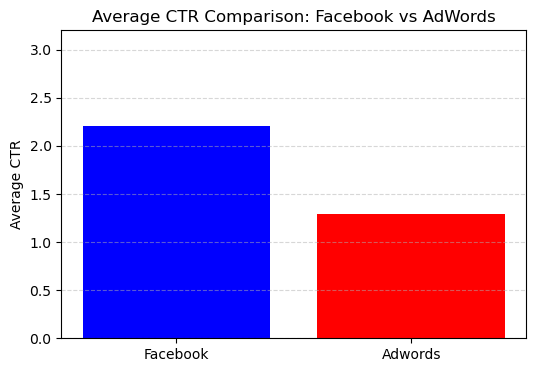

In [53]:
## average CTRs

fb_ctr = df['FB_CTR'].mean()
ad_ctr = df['ADW_CTR'].mean()

## bar plot

plt.figure(figsize= (6, 4))
plt.bar(['Facebook', 'Adwords'], [fb_ctr, ad_ctr], color=['blue', 'red'])
plt.ylabel('Average CTR')
plt.title('Average CTR Comparison: Facebook vs AdWords')
plt.ylim(0, max(fb_ctr, ad_ctr) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

* Facebook CTR: ≈ 2.20%
* AdWords CTR: ≈ 1.27%

Based on the analysis of 365 days of campaign data, the average CTR for Facebook is significantly higher than for AdWords, as confirmed by both the statistical test (Wilcoxon signed-rank test, p < 0.05) and the visualization. This suggests that Facebook campaigns tend to perform better in attracting clicks relative to impressions compared to AdWords.

### Which platform yields a higher Conversion Rate (CVR) on average?

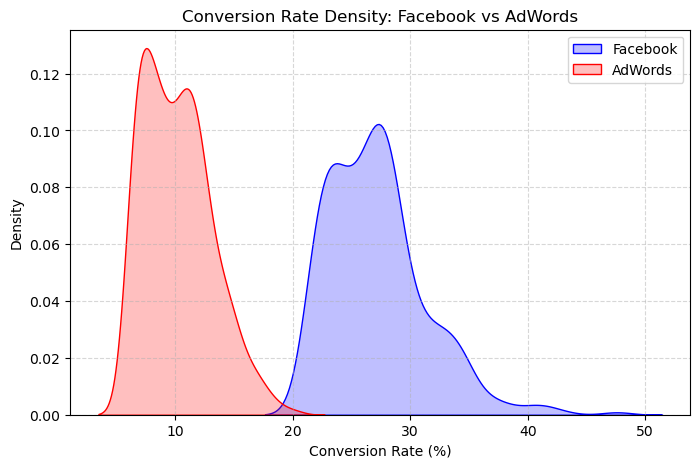

In [68]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['FB_CVR'], label='Facebook',color='blue', fill=True)
sns.kdeplot(df['ADW_CVR'], label='AdWords',color='red', fill=True)
plt.title('Conversion Rate Density: Facebook vs AdWords')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


* Facebook CVR (blue): Distribution centers around 25–30%, with values even reaching 50%.
* AdWords CVR (red): Mostly clusters around 8–12%, with a sharp drop-off after 15%.

Facebook not only has higher average CVR, but its distribution is also broader, suggesting more variability but consistently better performance.

AdWords CVR is lower and more tightly grouped, meaning it's more predictable but underperforms Facebook.

### Which platform is more cost-effective in terms of Cost per Click (CPC)?

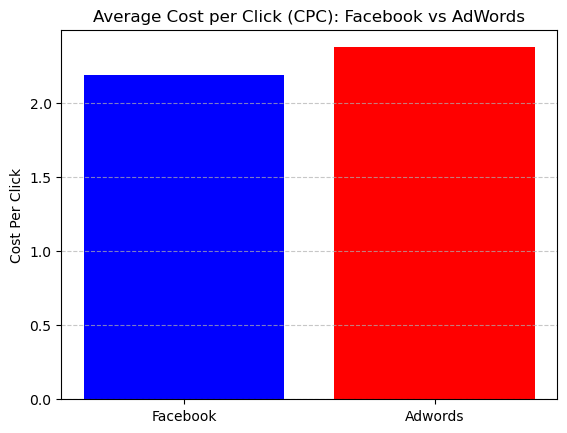

In [74]:
## avg cpc

fb_avg_cpc = df['FB_CPC'].mean()
ab_avg_cpc = df['ADW_CPC'].mean()

platforms = ['Facebook', 'Adwords']
avg_cpc = [fb_avg_cpc, ab_avg_cpc]
colors = ['blue', 'red']

plt.bar(platforms,avg_cpc,color=colors)
plt.title('Average Cost per Click (CPC): Facebook vs AdWords')
plt.ylabel('Cost Per Click')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Facebook: Lower average CPC
* AdWords: Higher average CPC

Facebook is more cost-effective in terms of CPC compared to AdWords.

###  Are the observed differences in CVR and CPC between the two platforms statistically significant?

In [95]:
stat_cvr, p_cvr = wilcoxon(df['FB_CVR'], df['ADW_CVR'])
print('CVR Stat', stat_cvr)
print('CVR P Value', p_cvr)
print()
stat_cpc, p_cpc = wilcoxon(df['FB_CPC'], df['ADW_CPC'])
print('CPC Stat', stat_cpc)
print('CPC P Value', p_cpc)

CVR Stat 0.0
CVR P Value 1.4320844402117284e-61

CPC Stat 26930.5
CPC P Value 0.0017578619462941302


* CVR: Facebook yields a significantly higher conversion rate compared to AdWords.
* CPC: Facebook is significantly more cost-effective per click than AdWords.
</br>So yes — all observed differences are statistically significant

### How does ad performance vary over time (e.g., by month)?

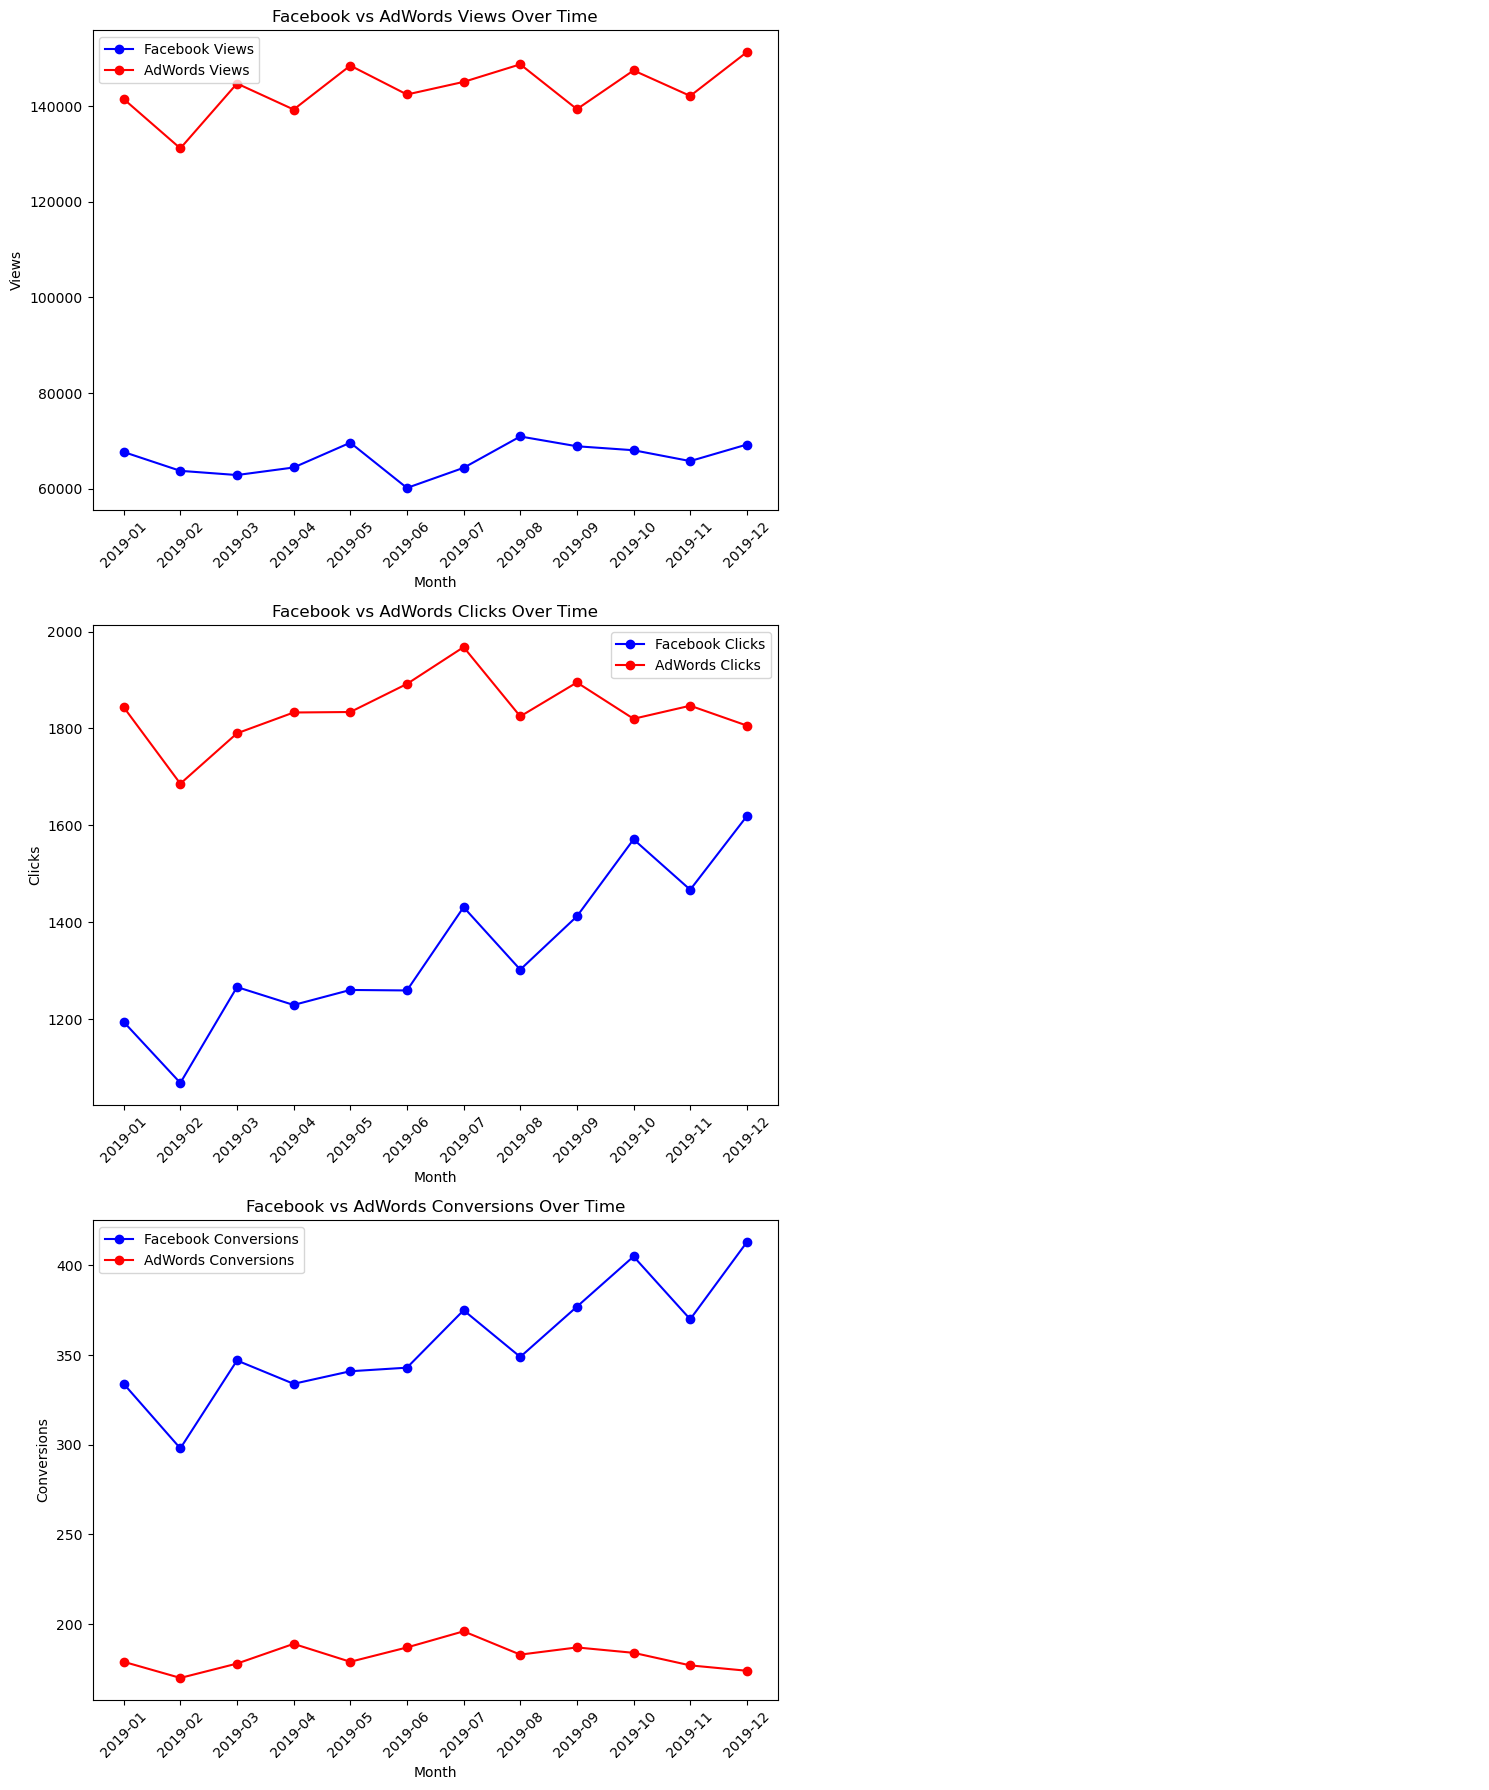

In [112]:
# Create a 'Month' column
df['Month'] = df['Date'].dt.to_period('M')

# Aggregate metrics by Month for both Facebook and AdWords separately
monthly_performance = df.groupby('Month').agg({
    'FB_Views': 'sum',
    'ADW_Views': 'sum',
    'FB_Clicks': 'sum',
    'ADW_Clicks': 'sum',
    'FB_Conversions': 'sum',
    'ADW_Conversions': 'sum',
}).reset_index()

# Create separate plots for Facebook and AdWords metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Remove empty plots (right side of the layout)
for i in range(3):
    axes[i, 1].axis('off')

# Plot for FB Views and ADW Views
axes[0, 0].plot(monthly_performance['Month'].astype(str), monthly_performance['FB_Views'], marker='o', color='b', label='Facebook Views')
axes[0, 0].plot(monthly_performance['Month'].astype(str), monthly_performance['ADW_Views'], marker='o', color='r', label='AdWords Views')
axes[0, 0].set_title('Facebook vs AdWords Views Over Time')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Views')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend()

# Plot for FB Clicks and ADW Clicks
axes[1, 0].plot(monthly_performance['Month'].astype(str), monthly_performance['FB_Clicks'], marker='o', color='b', label='Facebook Clicks')
axes[1, 0].plot(monthly_performance['Month'].astype(str), monthly_performance['ADW_Clicks'], marker='o', color='r', label='AdWords Clicks')
axes[1, 0].set_title('Facebook vs AdWords Clicks Over Time')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Clicks')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()

# Plot for FB Conversions and ADW Conversions
axes[2, 0].plot(monthly_performance['Month'].astype(str), monthly_performance['FB_Conversions'], marker='o', color='b', label='Facebook Conversions')
axes[2, 0].plot(monthly_performance['Month'].astype(str), monthly_performance['ADW_Conversions'], marker='o', color='r', label='AdWords Conversions')
axes[2, 0].set_title('Facebook vs AdWords Conversions Over Time')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Conversions')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

1. Views Over Time
* AdWords consistently outperformed Facebook in terms of monthly views throughout the year.
* While Facebook views fluctuated modestly, AdWords views remained high and relatively stable with a slight upward trend in the last quarter.
2. Clicks Over Time
* AdWords had higher clicks in most months, but the gap narrowed as the year progressed.
* Facebook clicks steadily increased from around 1100 in Feb to 1600+ in Dec, showing growing engagement.
* AdWords clicks peaked mid-year (June-July) and slightly declined afterward, indicating possible campaign fatigue.
3. Conversions Over Time
* Despite fewer views and clicks, Facebook drove significantly more conversions than AdWords in all months.
* Facebook conversions rose sharply towards the year-end, suggesting increasing campaign efficiency.
* AdWords conversions remained flat, indicating lower ROI even with more visibility and clicks.



###  Are there any patterns that suggest seasonality or campaign fatigue?

Yes, charts do suggest some signs of seasonality and possible campaign fatigue:

<b>Seasonality Patterns</b>

* Facebook Conversions show a clear upward trend towards the end of the year, especially from September to December.
  </br> → This may align with holiday shopping behavior, end-of-year sales, or festive campaigns (e.g., Diwali, Christmas, New Year).
* Facebook Clicks steadily rise month-over-month, supporting the idea that user engagement ramps up in Q4, possibly due to more attractive campaigns or higher consumer intent during this period.
* AdWords Views also rise slightly in Q4, but without corresponding increases in clicks or conversions, suggesting diminishing returns.

<b>Campaign Fatigue (especially for AdWords)</b>
* AdWords Conversions stay relatively flat throughout the year, even slightly declining toward the end, despite consistently high views and clicks. → This may indicate audience saturation, poor ad relevance over time, or banner blindness.

* AdWords Clicks peak mid-year (June–July) and then start declining, showing signs of engagement fatigue even though impressions are stable or increasing.

### Based on the analysis, should the company increase, reduce, or redistribute its budget allocation between Facebook and AdWords?

Based on the visual analysis, the company should redistribute its budget allocation, with a higher emphasis on Facebook, while re-evaluating and optimizing AdWords spend. Here's why:

<b>Reasons to Increase Budget for Facebook:</b></br>

* Rising Conversions: Facebook conversions have shown a strong upward trend, peaking in Q4 — indicating that investment is turning into revenue.

* Improving Engagement: Facebook clicks are increasing month-over-month, showing growing user interest in ads.

* Strong ROI Signals: Despite lower views than AdWords, Facebook delivers higher conversion efficiency, suggesting better ROI.

<b>Reasons to Reduce or Re-optimize AdWords Spend:</b></br>

* Stagnant Conversions: AdWords conversions are relatively flat or declining, despite consistently high views and clicks.

* Possible Campaign Fatigue: Declining click-through and conversion rates point to ad fatigue or poor targeting.

* Lower Conversion Effectiveness: High views and clicks are not translating to results, leading to wasted spend.
